# Transformers

In this part we will cover Transformer based large pretrained models. 

This notebook focus on showing how you can use the widely known Hugging Face library to apply different types of transformer models to a different range of tasks, from NLP to CV.

We hope you learn how you can levarage pretrained transformer-based models and how to fine-tune them to a specific downstream task. 

To dive deep into transformers, we recommend to start by reading
    
- http://jalammar.github.io/illustrated-transformer/

This gives a step by step explanation of the original paper [Attention Is All You Need](https://arxiv.org/abs/1706.03762)

#### Code implemantation

It's also good pratice to try implementing yourself the original code before using a Transformers library:

Code Implementation
- http://nlp.seas.harvard.edu/2018/04/03/attention.html

# Hugging Face 🤗

"Training a transformer model and deploying these models can be quite challeging. In general these models have millions to tens of billions of parameters and requires large amount of data. 

This becomes very costly in terms of time and compute resources. It even translates to environmental impact. Imagine if each time a research team, a student organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!


The 🤗 Transformers library was created to solve this problem. Its goal is to provide a single API through which any Transformer model can be loaded, trained, and saved. 

The Hugging Face 🤗 Transformers library provides the functionality to create and use those shared models."

For more details look at the official [Hugging Face course](https://huggingface.co/course/chapter1/1)

## Setup

In [1]:
!pip3 install transformers
!pip3 install ipywidgets --user
!pip3 install torchtext #we will also use this later on for the data, so install it if you don't have it

     |████████████████████████████████| 3.5 MB 3.1 MB/s eta 0:00:01
  Using cached sacremoses-0.0.47-py2.py3-none-any.whl (895 kB)
     |████████████████████████████████| 3.7 MB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 15.4 MB/s eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.8
    Uninstalling packaging-20.8:
      Successfully uninstalled packaging-20.8
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


### Important:

After this instalation --> don't forget to restart the kernel of the jupyter

## Examples of transformer architectures available

As menioned above, the Transformer architecture was introduced in the paper [Attention Is All You Need](https://arxiv.org/abs/1706.03762), 2017, in which the focus of the original research was on translation tasks using encoder-decoder blocks. 

This was then followed by the introduction of several influential models, including encoder only models (e.g., BERT) and decoder only models (e.g., GPT), and there have been also a variety of encoder-decoder transformer based models (e.g., BART and T5). 

### Encoder

Encoder models use only the encoder block of a Transformer model. 

These models are often characterized as having “bi-directional” attention, and are often called auto-encoding models.

Encoder models are best suited for tasks requiring an understanding of the full sentence, such as:
   - sentence classification
   - named entity recognition (word classification in general), 
   - extractive question answering
   - sentence representation (contextual embeddings)

    
The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.


There a variaty of encoder models available at Hugging Face. Some examples include:

- [BERT](https://huggingface.co/docs/transformers/model_doc/bert)
- [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert)
- [RoBERTa](https://huggingface.co/docs/transformers/model_doc/roberta)

Hugging Face also provides recent vision and multi-modal encoder models (see at the end of this notebook):
- [Vision Transformer (ViT)](https://huggingface.co/docs/transformers/model_doc/vit)
- [LXMERT](https://huggingface.co/docs/transformers/model_doc/lxmert)
- [VISUALBERT](https://huggingface.co/docs/transformers/model_doc/visual_bert)
- [CLIP](https://huggingface.co/docs/transformers/model_doc/clip)

### Decoder

Decoder models use only the decoder of a Transformer model. At each stage, for a given word, the self-attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models.

The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

Representatives of this family of models include:

Some examples of decoder models available in Hugging Face include:
- [GPT](https://huggingface.co/docs/transformers/model_doc/openai-gpt)
- [GPT-2](https://huggingface.co/docs/transformers/model_doc/gpt2)
- [Transformer XL](https://huggingface.co/docs/transformers/model_doc/transfo-xl)

## Encoder-decoder models

Encoder-decoder models (also called sequence-to-sequence models) use both parts of the Transformer architecture. 

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input (conditional text generation), such as:
- summarization
- translation
- or generative question answering

Representatives of this family of models include:

- [BART](https://huggingface.co/docs/transformers/model_doc/bart)
- [Marian](https://huggingface.co/docs/transformers/model_doc/marian)
- [T5](https://huggingface.co/docs/transformers/model_doc/t5)

# Pipeline

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer.

See all details of pipelone here: https://huggingface.co/docs/transformers/v4.16.0/en/main_classes/pipelines#transformers.TranslationPipeline

In [1]:
from transformers import pipeline
import torch

classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"])

# By default, this pipeline selects a particular pretrained model 
# that has been fine-tuned for sentiment analysis in English. 

# The model is downloaded and cached when you create the classifier object. 
# If you rerun the command, the cached model will be used instead 
# and there is no need to download the model again.


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598050713539124},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

Try with your own text:

In [2]:
text = input()
classifier(text)

This lecture is amazing!!!


[{'label': 'POSITIVE', 'score': 0.9998607635498047}]

Besides sentiment analysis, some of the currently available pipelines are:

- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- summarization
- text-generation
- translation
- zero-shot-classification

Let’s now for instance check how to use a pipeline to generate some text.

In [3]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to use transformer models and")

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use transformer models and methods of programming in the Rust language.\n\nWhy is this course helpful?\n\nThis course will provide you with some valuable information to help you write the very best you can'}]

The previous examples used the default model for the task at hand, but you can also choose a particular model for any of the above tasks. 

For the specific case of the generation task, you can also control:
- how many different sequences are generated with the argument num_return_sequences
- the total length of the output text with the argument max_length.

In [4]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    input(),
    max_length=30,
    num_return_sequences=2,
)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

A group of unicorns was seated in the class.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'A group of unicorns was seated in the class. The members of the students applauded, and the students cheered as though nothing was happening.\n\n'},
 {'generated_text': 'A group of unicorns was seated in the class. The group was a member who was standing in line in line, holding his head and a fist'}]

Try it yourself with different pipelines available. 

To check how to use one in specific see the documentation: https://huggingface.co/docs/transformers/v4.16.0/en/main_classes/pipelines)

In [5]:
# Trying the machine translation pipeline
translator = pipeline("translation_en_to_fr")
translator("I am liking this course a lot")

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

[{'translation_text': "J'aime beaucoup ce cours"}]


# Pipeline with a real dataset

Lets try this pipeline with sentences from a dataset, such as the IMDB dataset
    

In [6]:
import torch
from torchtext.legacy import data, datasets

TEXT = data.Field()
LABEL = data.LabelField(dtype = torch.float)

_, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


100%|██████████| 84.1M/84.1M [00:12<00:00, 6.67MB/s]


In [7]:
#Ideally we should run all the senteces to the model and see it's performance on test (or validation set).
#But lets just pick first some number of sentences to run faster (or you could use GPU): such as first 50 sentences and last 50 sentences
labels=list(test_data.label)[:50]+list(test_data.label)[-50:] 
sents_with_tokens=list(test_data.text)[:50]+list(test_data.text)[-50:]

In [8]:
# We need to have the corresponding sentences (and not tokens) 
# so that the pipeline tokenizes the text by itself according to the model tokenization
# we can give a max nº of words to be faster (e.g., in terms of performing self attention)
MAX_LEN=500
sents=[" ".join(tokens)[:MAX_LEN] for tokens in sents_with_tokens] 

In [9]:
from tqdm import tqdm

classifier = pipeline("sentiment-analysis")
preds=[]
for sent in tqdm(sents):
    preds.append(classifier(sent))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
100%|██████████| 100/100 [00:14<00:00,  6.95it/s]


In [10]:
count_correct=0
for i in range(len(preds)):
    if labels[i] in preds[i][0].get("label").lower():
        count_correct +=1
print("acc", count_correct/len(labels))              

acc 0.78


# Dive deep into Hugging Face


Besides the currently available pipelines, we can dive deep and use any model available in HG and apply it to any given task. 

We’ll dive into the model and configuration classes, and show you how to load a model and how it processes numerical inputs to output predictions. 


## Behind pipeline 
Lets begin with an end-to-end example where we use a model and a tokenizer together to replicate the pipeline() function of sentiment analysis introduced before.

There are three main steps involved when you pass some text to a pipeline:
1. <b> Preprocessing with a tokenizer:</b> The text is preprocessed into a format the model can understand.
2. <b> Going through the model:</b> The preprocessed inputs are passed to the model.
3. <b> Postprocessing the output
: </b> The predictions of the model are post-processed, so you can make sense of them.

<img src="HG_img" >

### 1. Preprocessing with a tokenizer:

Like other neural networks, Transformer models can’t process raw text directly.

So the first step of our pipeline is to convert the text inputs into numbers that the model can make sense of. 

To do this we use a <b> tokenizer</b>. They serve the purpose to translate text into data that can be processed by the model.

Tokenizer will be responsible for:

- Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
- Mapping each token to an integer
- Adding additional inputs that may be useful to the model (e.g., attention mask)

#### Define tokenizer 

The tokenizer and the model should always be from the same checkpoint. Therefore, we need to define the tokenizer with the checkpoint name of the corresponding model. 


To do this, we use the <b> AutoTokenizer class </b> and its <b> from_pretrained() </b> method with the checkpoint name of the corresponding model inside it.

This will automatically fetch the data associated with the model’s tokenizer (as the vocabulary) and cache it (so it’s only downloaded the first time you run the code below).

In [11]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Alternatively to the wrapper AutoModel class, you can use directly the class of the corresponding tokenizer.

In [12]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

You can use either one of the two. But note that the AutoTokenizer produces checkpoint-agnostic code

- The AutoTokenizer will works for other checkpoints besides BERT (e.g.: distilbert-base-uncased-finetuned-sst-2-english), 
- Whereas the BertTokenizer just works for checkpoints related to BertTokenizer

In [13]:
tokenizer = BertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


To mimic our sentiment analysis pipeline, let's actually use the DistilBERT model and thus use the corresponding DistilBERT tokenizer (with checkpoint "bert-base-uncased")

In [14]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

#### Encode the sentences

Once we have the tokenizer, we can directly pass our sentences to it.

Translating text to numbers is known as encoding. Encoding is done in a two-step process: 
- the tokenization
- followed by the conversion to input IDs.

---------
To know more about each of the 2 steps:
The first step is to split the text into words (or parts of words, punctuation symbols, etc.), usually called tokens. There are multiple rules that can govern that process, which is why we need to instantiate the tokenizer using the name of the model, to make sure we use the same rules that were used when the model was pretrained.

The second step is to convert those tokens into numbers, so we can build a tensor out of them and feed them to the model. To do this, the tokenizer has a vocabulary, which is the part we download when we instantiate it with the from_pretrained() method. Again, we need to use the same vocabulary used when the model was pretrained.


In [15]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "I find this very easy!"
]
inputs = tokenizer(
    raw_inputs,
    padding=True,        #since the sentences might not have the same size, don't forget to padding. 
    return_tensors="pt"  #to return with pytorch tensors
)

# - Feeding your raw_sentences to the tokenizer will give the corresponding input_id
# - As well as the attention_mask, usufel so that there is no self attention between padding words. 

# - In case of BERT it will also produce "token_type_ids" 
#   useful when the model receives sentence A and B together (e.g., for text similarity tasks) 
      # (0 corresponds to a sentence A token,
      # 1 corresponds to a sentence B token.)

print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0],
        [  101,  1045,  2424,  2023,  2200,  3733,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


Note that each word can correspond to more than one id, since DistilBERT uses subword tokenization

In [16]:
tokens = tokenizer.tokenize(raw_inputs[0])
print(tokens)

['i', "'", 've', 'been', 'waiting', 'for', 'a', 'hugging', '##face', 'course', 'my', 'whole', 'life', '.']


Besides encoding the corresponding input text, we can also decode, going the other way around: from vocabulary indices to get the corresponding string.

    

In [18]:
tokens_id = tokenizer.encode(raw_inputs[0])
print("Tokens id:", tokens_id)

decode_inputs = tokenizer.decode(tokens_id)
print("\nDecoded inputs:", decode_inputs)

decode_inputs = tokenizer.decode(tokens_id, skip_special_tokens=True)
print("\nWithout special tokens:", decode_inputs)


Tokens id: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]

Decoded inputs: [CLS] i've been waiting for a huggingface course my whole life. [SEP]

Without special tokens: i've been waiting for a huggingface course my whole life.


# Going through the model


#### Define model

We can download our model that is already trained in the same way that we did with our tokenizer:

- You can use AutoModel class which also has from_pretrained() method or use directly
- You could replace AutoModel directly with the corresponding model class.

In [19]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

# we have downloaded the same checkpoint we used in our pipeline before
# threfore it should actually have been cached already

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
from transformers import DistilBertModel

model = DistilBertModel.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


It's also possible to load a model from scratch without trained weights:

In [21]:
from transformers import DistilBertConfig

config = DistilBertConfig()
model_without_pretrained = DistilBertModel(config)

#### Feed the inputs

This model is now initialized with all the weights of the checkpoint. It can be used directly for inference on the tasks it was trained on, and it can also be fine-tuned on a new task. By training with pretrained weights rather than from scratch, we can quickly achieve good results.

We can now feed the inputs we preprocessed before (with the tokenizer) to our model:
    
    {'input_ids': 
    
        tensor([
            [  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
              2607,  2026,  2878,  2166,  1012,   102],
            [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
                 0,     0,     0,     0,     0,     0],
            [  101,  1045,  2424,  2023,  2200,  3733,   999,   102,     0,     0,
                 0,     0,     0,     0,     0,     0]]),
             
     'attention_mask': 
     
         tensor(
            [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}
    

In [22]:
outputs = model(**inputs) #you give further arguments: output_attentions=True and output_hidden_states:True
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1798,  0.2333,  0.6321,  ..., -0.3017,  0.5008,  0.1481],
         [ 0.2758,  0.6497,  0.3200,  ..., -0.0760,  0.5136,  0.1329],
         [ 0.9046,  0.0985,  0.2950,  ...,  0.3352, -0.1407, -0.6464],
         ...,
         [ 0.1466,  0.5661,  0.3235,  ..., -0.3376,  0.5100, -0.0561],
         [ 0.7500,  0.0487,  0.1738,  ...,  0.4684,  0.0030, -0.6084],
         [ 0.0519,  0.3729,  0.5223,  ...,  0.3584,  0.6500, -0.3883]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8987, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.3017,  0.9002, -0.0200,  ..., -0.1082, -0.8412, -0.0861],
         [-0.3338,  0.9674, -0.0729,  ..., -0.1952, -0.8181, -0.0634],
         [-0.3454,  0.8824, -0.0426,  ..., -0.0993, -0.8329, -0.1065]],

        [[-0.3841, -0.1072,  0.3243,  ...,  0.2156,  0.2593,  0.0866],
         [ 

Note that the outputs of 🤗 Transformers models behave like named tuples or dictionaries. 

You can access the elements by:
- attributes (like we did) 
- or by key (outputs["last_hidden_state"])
- or even by index if you know exactly where the thing you are looking for is (outputs[0]).


In [23]:
print("last hidden state", outputs.last_hidden_state)


last hidden state tensor([[[-0.1798,  0.2333,  0.6321,  ..., -0.3017,  0.5008,  0.1481],
         [ 0.2758,  0.6497,  0.3200,  ..., -0.0760,  0.5136,  0.1329],
         [ 0.9046,  0.0985,  0.2950,  ...,  0.3352, -0.1407, -0.6464],
         ...,
         [ 0.1466,  0.5661,  0.3235,  ..., -0.3376,  0.5100, -0.0561],
         [ 0.7500,  0.0487,  0.1738,  ...,  0.4684,  0.0030, -0.6084],
         [ 0.0519,  0.3729,  0.5223,  ...,  0.3584,  0.6500, -0.3883]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8987, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.3017,  0.9002, -0.0200,  ..., -0.1082, -0.8412, -0.0861],
         [-0.3338,  0.9674, -0.0729,  ..., -0.1952, -0.8181, -0.0634],
         [-0.3454,  0.8824, -0.0426,  ..., -0.0993, -0.8329, -0.1065]],

        [[-0.3841, -0.1072,  0.3243,  ...,  0.2156,  0.2593,  0.0866],
         [ 0.3034,  0.3026,

Note also that given the input to the model, it will output a high-dimensional vector representing the contextual understanding of that input by the Transformer model.

The vector output by the Transformer module generally has three dimensions:

- Batch size: The number of sequences processed at a time (2 in our example).
- Sequence length: The length of the numerical representation of the sequence (16 in our example).
- Hidden size: The vector dimension of each model input.



In [24]:
print("size", outputs.last_hidden_state.size())

size torch.Size([3, 16, 768])


## Postprocessing the output
 
While the hidden states that were outputed can be useful on their own, for instance: 

- You can have a <b> contextual representation </b> for the entire sentence deriving a fixed sized vector by averaging the outputs. Instead of having static embeddings like in part 1)

- You can also give this hidden states of the encoder to an auto-regressive decoder that is equipped with cross-attention layers to perform condional text generation (such as MT). 


In this case for sentiment analysis we are more interesting in using the corresponding classification head. 

For our example, we will use the DistilBERT model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we won’t actually use the DistilBertModel class but the DistilBertForSequenceClassification (or AutoModelForSequenceClassification class). 

In [25]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "I find this very easy!"
]
inputs = tokenizer(
    raw_inputs,
    padding=True,        #since the sentences might not have the same size, don't forget to padding. 
    return_tensors="pt"  #to return with pytorch tensors
)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
outputs = model(**inputs)
logits = outputs.logits.detach()

In [26]:
logits

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464],
        [-3.0649,  3.0434]])

Those are not probabilities but logits, the raw, unnormalized scores outputted by the last layer of the model. 

To be converted to probabilities, they need to go through a SoftMax layer

In [35]:
predictions = torch.nn.functional.softmax(logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5981e-01],
        [9.9946e-01, 5.4419e-04],
        [2.2193e-03, 9.9778e-01]])


In [36]:
raw_inputs
for i in range(len(predictions)):
    if predictions[i][1].item()>=0.5:
        print(raw_inputs[i],model.config.id2label[1])
    else:
        print(raw_inputs[i],model.config.id2label[0])

model.config.id2label

I've been waiting for a HuggingFace course my whole life. POSITIVE
I hate this so much! NEGATIVE
I find this very easy! POSITIVE


{0: 'NEGATIVE', 1: 'POSITIVE'}

We have successfully reproduced the three steps of the pipeline: preprocessing with tokenizers, passing the inputs through the model, and postprocessing! 🤗


# Fine-tuning

To fine-tuning a transformer model to our specific dataset (using corresponding labels), you can just use the core of the training loop that we've been using since the Pytorch pratical:

1. Put the model and the corresponding data (batches) into the corresponding device ("cpu" or "gpu")
2. When iterate over the corresponding batches, each update to the model involves the same general pattern comprised of:
    - Clearing the last error gradient. ( stop gradient accumulation )
    - A forward pass of the input through the model
    - Calculating the loss for the model output.
    - Backpropagating the error through the model.
    - Update the model in an effort to reduce loss.

    


There's just a slightly difference: transformer models are usually trained with a learning rate scheduler.

For instance, a default learning rate scheduler is a linear decay from the maximum value (5e-5) to 0. To properly define it, we need to know the number of training steps we will take, which is the number of epochs we want to run multiplied by the number of training batches (which is the length of our training dataloader). 


    from transformers import get_scheduler

    num_epochs = 3
    num_training_steps = num_epochs * len(train_dataloader)
    lr_scheduler = get_scheduler(
        "linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

Summing up, to fine-tune or training or model from scratch we could simply use the core of the training loop that we've been using:

    model.train()
    for epoch in range(num_epochs):
        for batch in train_dataloader:
        
            outputs = model(**batch)
            
            # you can use a given pytorch loss (torch.nn.CrossEntropyLoss)
            # or you can also use outputs.loss if you give "labels" directly to your model
            loss = criterion(outputs) 
            
            loss.backward()
            
            optimizer.step()
            
            lr_scheduler.step()
            
            optimizer.zero_grad()
           

Alternative, in case you would prefer to avoid defining manually this training loop, Hugging Face Transformers also provides a [Trainer API](https://huggingface.co/course/chapter3/3?fw=pt) that does that for you.

# Vision and Multi-modal Transformers

Transformer architecture are currently achieving state-of-the-art results not just on a variety of language processing, but also on computer vision.

Hugging Face contains the very recent [Vision Transformer (ViT)](https://huggingface.co/docs/transformers/model_doc/vit) model from Google. 

Lets try it out for image classification with our own images:

shape torch.Size([480, 640, 3])


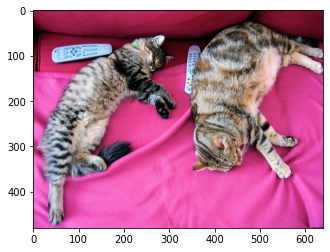

In [37]:
import torchvision.transforms.functional as TF
from PIL import Image
import requests
import matplotlib.pyplot as plt


# Choose your image here
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_tensor = TF.to_tensor(image)
image_tensor = image_tensor.permute(
    [1,2,0]) # make the color dimention the last one.
print("shape", image_tensor.shape)
plt.imshow(image_tensor)
plt.show()

We can predict the class of the chosen image with the same logic that we saw before:
   1. define "tokenizer" 
       - Actually a feature extractor since we are processing images
   2. define the model
   3. postprocessing the output

In [38]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Predicted class: Egyptian cat


It correctly predicted "Egyptian cat". You can also try with your own images.

In this case, we wanted to use ViT for classification hence ViTForImageClassification, but if we wanted the corresponding hidden states we could have use instead ViTModel, as we saw before with the DistilBERT.

In [39]:
from transformers import ViTModel
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
outputs = model(**inputs) 
last_hidden_states = outputs.last_hidden_state

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

In [40]:
print("last_hidden_states", last_hidden_states) 

last_hidden_states tensor([[[ 0.1559,  0.0914,  0.1518,  ..., -0.3180, -0.0859, -0.0903],
         [-0.2254,  0.0864,  0.4752,  ..., -0.1781,  0.1726,  0.1334],
         [ 0.0444,  0.0677,  0.4199,  ..., -0.2576,  0.1191,  0.0130],
         ...,
         [-0.0153, -0.0396,  0.1684,  ..., -0.1672,  0.1869,  0.1025],
         [ 0.0249, -0.0382,  0.2046,  ...,  0.0517,  0.1489,  0.1320],
         [-0.1748, -0.0254,  0.2523,  ..., -0.1474,  0.1627,  0.1325]]],
       grad_fn=<NativeLayerNormBackward0>)


Hugging Face has also been incorporating multi-modal encoders (vision and text), including VisualBERT, LXMERT and even the CLIP model from openai.

With CLIP we can for instance predict image-text similarity:

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

print("probs",probs) 

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/577M [00:00<?, ?B/s]

It correctly predicted that the image of the cat has more similarity with the sentence: "a photo of a cat" than "a photo of a dog".

______
See the complete course to better understand: [Hugging Face course](https://huggingface.co/course/chapter1/1?fw=pt).

You can attempt to answer their quizzes to make sure you fully understand it.